In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
plt.rcParams["font.family"] = "STXIHEI"

import statsmodels.api as sm

In [6]:
from sklearn import datasets

boston = datasets.load_boston()

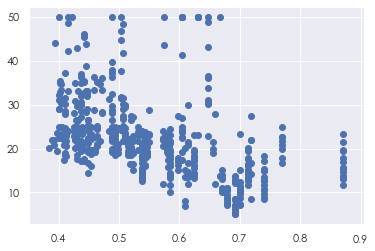

In [10]:
dfboston = pd.DataFrame(boston.data,columns = boston.feature_names)
dfboston

plt.scatter(dfboston.NOX,boston.target)

In [11]:
dfboston["cons"] = 1
dfboston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,cons
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1


In [12]:
import statsmodels.api as sm

temp = sm.add_constant(dfboston.iloc[:,[0,1]])
temp.head()

d:\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,CRIM,ZN
0,1.0,0.00632,18.0
1,1.0,0.02731,0.0
2,1.0,0.02729,0.0
3,1.0,0.03237,0.0
4,1.0,0.06905,0.0


In [17]:
from statsmodels.regression.linear_model import OLS

regres = OLS(boston.target,dfboston[["cons","NOX"]]).fit()

In [18]:
regres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     112.6
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           7.07e-24
Time:                        09:17:02   Log-Likelihood:                -1789.2
No. Observations:                 506   AIC:                             3582.
Df Residuals:                     504   BIC:                             3591.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons          41.3459      1.811     22.828      0.000      37.787      44.904
NOX          -33.9161      3.196    -10.611      0.000     -40.196     -27.636
==============================================================================
Omnibus:                      165.520   Durbin-Watson:                   0.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.900
Skew:                           1.641   Prob(JB):                     2.70e-94
Kurtosis:                       6.109   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

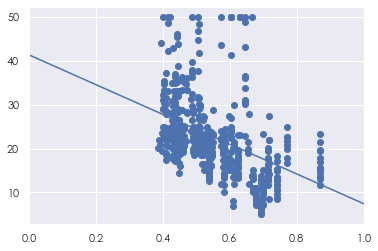

In [21]:
# 绘制回归线
from statsmodels.graphics.api import abline_plot

fig = abline_plot(41.3459,-33.9161)
plt.scatter(dfboston.NOX,boston.target)

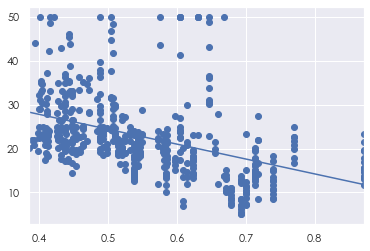

In [23]:
fig = abline_plot(model_results = regres)
plt.scatter(dfboston.NOX,boston.target)

In [24]:
from statsmodels.regression.linear_model import OLS

regres = OLS(boston.target,dfboston,missing = "drop").fit()

In [25]:
regres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 21 Aug 2019   Prob (F-statistic):          6.72e-135
Time:                        09:33:36   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
cons          36.4595      5.103      7.144      0.000      26.432      46.487
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
regres.params

CRIM       -0.108011
ZN          0.046420
INDUS       0.020559
CHAS        2.686734
NOX       -17.766611
RM          3.809865
AGE         0.000692
DIS        -1.475567
RAD         0.306049
TAX        -0.012335
PTRATIO    -0.952747
B           0.009312
LSTAT      -0.524758
cons       36.459488
dtype: float64

In [29]:
# 取出残差 估计值等备用
dfres = pd.DataFrame({
    "fit":regres.fittedvalues, # 拟合值
    "resid":regres.resid, # 原始残差
    "zresid":regres.resid_pearson # 标化残差
})

In [30]:
dfres.head()

,fit,resid,zresid
0,30.003843,-6.003843,-1.265219
1,25.025562,-3.425562,-0.721886
2,30.567597,4.132403,0.870842
3,28.607036,4.792964,1.010045
4,27.943524,8.256476,1.739928


In [31]:
from statsmodels.stats import stattools

stattools.jarque_bera(dfres.resid)

(783.1262780507551,
 8.836685621084793e-171,
 1.5207130459846399,
 8.281482435907572)

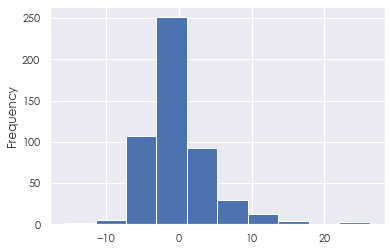

In [32]:
dfres.resid.plot.hist()

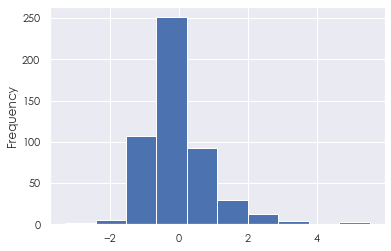

In [33]:
dfres.zresid.plot.hist()

In [34]:
# 逐步回归
from sklearn.feature_selection import f_regression as freg

freg(dfboston.iloc[:,[0,1,2,3]],boston.target)

(array([ 89.48611476,  75.2576423 , 153.95488314,  15.97151242]),
 array([1.17398708e-19, 5.71358415e-17, 4.90025998e-31, 7.39062317e-05]))

In [39]:
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs = 10)
lars.fit(boston.data,boston.target)

Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True, fit_path=True,
     n_nonzero_coefs=10, normalize=True, positive=False, precompute='auto',
     verbose=False)

In [41]:
lars.coef_

array([-3.90260976e-02,  1.61727800e-02, -3.15687900e-03,  2.42729710e+00,
       -9.25814897e+00,  4.22377413e+00,  0.00000000e+00, -8.18175590e-01,
        0.00000000e+00,  0.00000000e+00, -8.18875000e-01,  7.34088822e-03,
       -5.20944634e-01])

In [42]:
lars.active_

[12, 5, 10, 11, 3, 0, 7, 4, 1, 2]

In [43]:
lars.score(boston.data,boston.target)

0.7214303045434274

In [44]:
from statsmodels import stats as ss
regres = OLS(boston.target,dfboston[["cons","NOX"]]).fit()
ss.diagnostic.linear_harvey_collier(regres)

Ttest_1sampResult(statistic=0.41458589289996406, pvalue=0.6786221801379828)

In [45]:
# 曲线直线化
df = pd.read_excel("dmdata.xlsx",sheet_name="curve")
df.head()

,time,y
0,1,2.125
1,2,1.742
2,3,1.236
3,4,1.127
4,5,0.731


In [46]:
df["lny"] = np.log(df.y)
df = sm.add_constant(df)
df.head()

d:\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,time,y,lny
0,1.0,1,2.125,0.753772
1,1.0,2,1.742,0.555034
2,1.0,3,1.236,0.211880
3,1.0,4,1.127,0.119559
4,1.0,5,0.731,-0.313342


In [47]:
regres = OLS(df.lny,df.iloc[:,[0,1]]).fit()
regres.summary()

d:\python37\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lny   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     320.3
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           1.54e-10
Time:                        11:02:24   Log-Likelihood:                -2.0892
No. Observations:                  15   AIC:                             8.178
Df Residuals:                      13   BIC:                             9.595
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2712      0.162      7.831      0.000       0.921       1.622
time          -0.3195      0.018    -17.897      0.000      -0.358      -0.281
==============================================================================
Omnibus:                        1.428   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.490   Jarque-Bera (JB):                0.399
Skew:                           0.386   Prob(JB):                        0.819
Kurtosis:                       3.202   Cond. No.                         19.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
np.exp(regres.params[0])

3.56526211818848

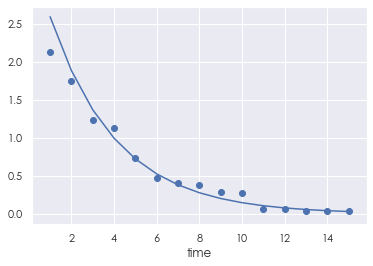

In [49]:
sns.lineplot(df.time,np.exp(regres.predict()))
plt.scatter(df.time,df.y)

In [50]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

IX = poly.fit_transform(boston.data)
print(len(IX[1]))
IX[:1]

105


array([[1.0000000e+00, 6.3200000e-03, 1.8000000e+01, 2.3100000e+00,
        0.0000000e+00, 5.3800000e-01, 6.5750000e+00, 6.5200000e+01,
        4.0900000e+00, 1.0000000e+00, 2.9600000e+02, 1.5300000e+01,
        3.9690000e+02, 4.9800000e+00, 3.9942400e-05, 1.1376000e-01,
        1.4599200e-02, 0.0000000e+00, 3.4001600e-03, 4.1554000e-02,
        4.1206400e-01, 2.5848800e-02, 6.3200000e-03, 1.8707200e+00,
        9.6696000e-02, 2.5084080e+00, 3.1473600e-02, 3.2400000e+02,
        4.1580000e+01, 0.0000000e+00, 9.6840000e+00, 1.1835000e+02,
        1.1736000e+03, 7.3620000e+01, 1.8000000e+01, 5.3280000e+03,
        2.7540000e+02, 7.1442000e+03, 8.9640000e+01, 5.3361000e+00,
        0.0000000e+00, 1.2427800e+00, 1.5188250e+01, 1.5061200e+02,
        9.4479000e+00, 2.3100000e+00, 6.8376000e+02, 3.5343000e+01,
        9.1683900e+02, 1.1503800e+01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

In [51]:
regres = OLS(boston.target,IX).fit()
regres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     51.06
Date:                Wed, 21 Aug 2019   Prob (F-statistic):          1.19e-179
Time:                        11:18:10   Log-Likelihood:                -1171.0
No. Observations:                 506   AIC:                             2550.
Df Residuals:                     402   BIC:                             2990.
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -175.2819     85.173     -2.058      0.040    -342.723      -7.841
x1            -4.5522      6.895     -0.660      0.509     -18.107       9.003
x2             0.2067      0.481      0.430      0.667      -0.738       1.152
x3            -4.6452      1.898     -2.448      0.015      -8.376      -0.914
x4            29.7133     10.051      2.956      0.003       9.953      49.473
x5           133.8581    128.821      1.039      0.299    -119.389     387.105
x6            21.6864      7.897      2.746      0.006       6.162      37.211
x7             0.9078      0.289      3.138      0.002       0.339       1.477
x8            -7.4828      5.022     -1.490      0.137     -17.356       2.390
x9             1.9508      2.536      0.769      0.442      -3.034       6.936
x10            0.0217      0.142      0.153      0.879      -0.257       0.300
x11            6.4428      3.995      1.613      0.108      -1.411      14.297
x12            0.0944      0.075      1.266      0.206      -0.052       0.241
x13            0.7237      0.894      0.809      0.419      -1.034       2.482
x14            0.0016      0.001      1.261      0.208      -0.001       0.004
x15            0.2170      0.194      1.118      0.264      -0.164       0.598
x16            0.3946      0.468      0.842      0.400      -0.526       1.315
x17            2.4904      0.561      4.440      0.000       1.388       3.593
x18           -0.7206      0.914     -0.789      0.431      -2.517       1.076
x19            0.1374      0.061      2.261      0.024       0.018       0.257
x20           -0.0031      0.004     -0.818      0.414      -0.011       0.004
x21           -0.0957      0.107     -0.892      0.373      -0.307       0.115
x22            0.2146      0.621      0.346      0.730      -1.006       1.435
x23           -0.0241      0.046     -0.527      0.598      -0.114       0.066
x24            0.3847      0.331      1.162      0.246      -0.266       1.036
x25           -0.0003      0.000     -1.766      0.078      -0.001     3.7e-05
x26            0.0208      0.007      3.068      0.002       0.007       0.034
x27           -0.0005      0.001     -0.787      0.432      -0.002       0.001
x28           -0.0052      0.005     -1.029      0.304      -0.015       0.005
x29           -0.0625      0.064     -0.978      0.328      -0.188       0.063
x30           -1.0460      0.620     -1.687      0.092      -2.265       0.173
x31            0.0136      0.027      0.503      0.615      -0.040       0.067
x32         7.228e-05      0.001      0.083      0.934      -0.002       0.002
x33           -0.0103      0.010     -1.065      0.288      -0.029       0.009
x34           -0.0050      0.007     -0.718      0.473      -0.019       0.009
x35            0.0006      0.000      3.105      0.002       0.000       0.001
x3

In [58]:
poly.powers_[17]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [59]:
from statsmodels.api import OLS

regres = OLS(boston.target,sm.add_constant(boston.data)).fit()

In [60]:
from statsmodels.stats.outliers_influence import OLSInfluence

Infstat = OLSInfluence(regres)


In [61]:
Infstat.cov_ratio[:10]

array([0.99914255, 1.02495877, 1.01869552, 1.01489109, 0.95781127,
       1.02859118, 1.04346112, 0.98451388, 1.05098217, 1.05968324])

In [62]:
Infstat.summary_table()

obs,endog,fitted,Cook's,student.,hat diag,dffits,ext.stud.,dffits
,,value,d,residual,,internal,residual,
0.0,24.0,30.00384337701683,0.0020024118241762623,-1.276064050690841,0.016924787892867957,-0.16743286875183042,-1.2768813335597027,-0.16754010476027462
1.0,21.6,25.02556237905306,0.00042285739509314836,-0.7259290892678462,0.01110917767416835,-0.07694155919465161,-0.72557966348727,-0.07690452339490503
2.0,34.7,30.567596718601564,0.0006558535027397216,0.87603570957232,0.011822954556224839,0.09582248712257525,0.8758283167233368,0.09579980209000882
3.0,33.4,28.607036488728095,0.0011805805659704219,1.0180663488537958,0.015696418372186074,0.12856176695886654,1.0181041490987814,0.12856654038674017
4.0,36.2,27.943524232872996,0.0035985142519793993,1.7541140294168867,0.01610951184943387,0.22445311209183888,1.7578357669353961,0.22492933858248276
5.0,28.7,25.256284461541046,0.0005741946645614952,0.731147198838803,0.014814787685200321,0.08965893878393238,0.7308009141608315,0.08961647467165326
6.0,22.9,23.001808268485394,4.7254684499145764e-07,-0.02160604568702688,0.013973681189933262,-0.002572091722680279,-0.021584087394722028,-0.0025694776977587537
7.0,27.1,19.535988428756028,0.005826354085775467,1.6186248157382739,0.03019378001322085,0.28560279620629864,1.6213015890647893,0.28607510698482486
8.0,16.5,11.52363685313043,0.0046299400025131545,1.0775667123889716,0.052871769624660316,0.2545960723090287,1.0777435888182019,0.25463786280204254


In [63]:
tmpdf = Infstat.summary_frame()
tmpdf.head()

,dfb_const,dfb_x1,dfb_x2,dfb_x3,dfb_x4,dfb_x5,dfb_x6,dfb_x7,dfb_x8,dfb_x9,dfb_x10,dfb_x11,dfb_x12,dfb_x13,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.034401,-0.018097,0.021848,0.102343,0.018148,-0.034833,0.037252,-0.029083,0.018124,0.068101,-0.074814,0.046858,0.002340,0.056059,0.002002,-1.276064,0.016925,-0.167433,-1.276881,-0.167540
1,-0.011263,-0.008720,0.031003,-0.005933,0.011916,0.019519,0.005450,-0.047008,-0.031617,-0.003906,0.010473,0.014600,0.001387,0.016907,0.000423,-0.725929,0.011109,-0.076942,-0.725580,-0.076905
2,-0.017148,0.019345,-0.049361,0.016261,-0.016776,-0.003297,0.035778,0.017390,0.035184,-0.006396,-0.007726,-0.002508,-0.002174,-0.022244,0.000656,0.876036,0.011823,0.095822,0.875828,0.095800
3,-0.033299,0.023290,-0.072702,-0.026471,-0.010938,0.036035,0.027589,-0.000122,0.055582,-0.001308,-0.010353,0.023320,-0.004375,-0.029991,0.001181,1.018066,0.015696,0.128562,1.018104,0.128567
4,-0.084752,0.034500,-0.126646,-0.046978,-0.019122,0.050501,0.086797,0.020832,0.109527,-0.004363,-0.016633,0.038618,0.001587,-0.007937,0.003599,1.754114,0.016110,0.224453,1.757836,0.224929


In [65]:
inf1 = regres.get_influence()


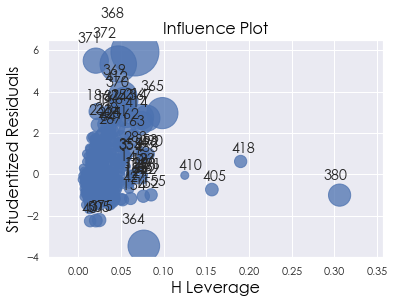

In [66]:
from statsmodels.graphics.regressionplots import influence_plot

fig = influence_plot(regres)

In [67]:
dfrlm = pd.read_excel("dmdata.xlsx",sheet_name = "rlm")
dfrlm.head()

,x1,x2,y
0,18.46,49.72,520.19
1,21.22,58.13,557.68
2,22.10,56.56,644.22
3,23.98,68.04,703.95
4,24.13,78.46,717.43


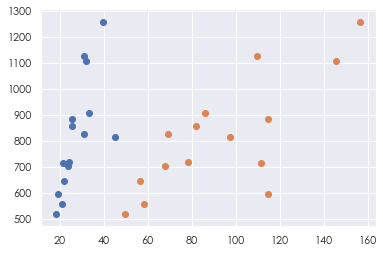

In [69]:
plt.scatter(dfrlm.x1,dfrlm.y)
plt.scatter(dfrlm.x2,dfrlm.y)

In [70]:
from statsmodels.formula.api import ols

lmres = ols("y ~ x1 + x2",dfrlm).fit()
lmres.summary()

d:\python37\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     16.68
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           0.000343
Time:                        14:59:21   Log-Likelihood:                -91.470
No. Observations:                  15   AIC:                             188.9
Df Residuals:                      12   BIC:                             191.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    124.7719    127.376      0.980      0.347    -152.757     402.300
x1            12.2659      4.771      2.571      0.025       1.871      22.661
x2             3.7798      1.142      3.309      0.006       1.291       6.269
==============================================================================
Omnibus:                        2.391   Durbin-Watson:                   2.886
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                0.922
Skew:                          -0.586   Prob(JB):                        0.631
Kurtosis:                       3.315   Cond. No.                         418.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
from statsmodels.formula.api import rlm

rlmres = rlm("y ~ x1 + x2",dfrlm).fit()
rlmres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                   15
Model:                            RLM   Df Residuals:                       12
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 21 Aug 2019                                         
Time:                        15:00:17                                         
No. Iterations:                    14                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.3607     70.848      0.330      0.742    -115.498     162.220
x1            18.5273      2.654      6.982      0.000      13.326      23.728
x2             3.1733      0.635      4.994      0.000       1.928       4.419
==============================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

In [72]:
rlm("y ~ x1 + x2",dfrlm,M = sm.robust.norms.LeastSquares()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                   15
Model:                            RLM   Df Residuals:                       12
Method:                          IRLS   Df Model:                            2
Norm:                    LeastSquares                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 21 Aug 2019                                         
Time:                        15:02:37                                         
No. Iterations:                     2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    124.7719    127.376      0.980      0.327    -124.880     374.424
x1            12.2659      4.771      2.571      0.010       2.915      21.617
x2             3.7798      1.142      3.309      0.001       1.541       6.019
==============================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

In [73]:
dfdmdata
dfridge = sm.add_constant(dfridge)
dfridge.head()

d:\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,long,touwei,weight,y
0,1.0,13.0,9.2,50,13
1,1.0,18.7,13.2,102,14
2,1.0,21.0,14.8,150,15
3,1.0,19.0,13.3,110,16
4,1.0,22.8,16.0,200,17


In [74]:
regmodel = OLS(dfridge.y,dfridge.iloc[:,[0,1,2,3]]).fit()
regmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     238.1
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           1.14e-14
Time:                        15:11:04   Log-Likelihood:                -32.329
No. Observations:                  22   AIC:                             72.66
Df Residuals:                      18   BIC:                             77.02
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0117      1.718      6.408      0.000       7.401      14.622
long           1.6927      0.370      4.580      0.000       0.916       2.469
touwei        -2.1588      0.536     -4.031      0.001      -3.284      -1.034
weight         0.0075      0.001      6.531      0.000       0.005       0.010
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                0.894
Skew:                           0.461   Prob(JB):                        0.640
Kurtosis:                       3.354   Cond. No.                     8.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

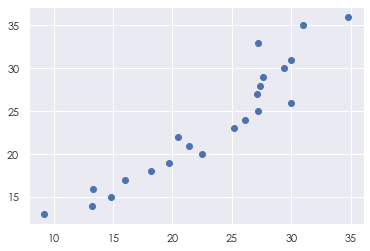

In [76]:
plt.scatter(dfridge.touwei,dfridge.y)

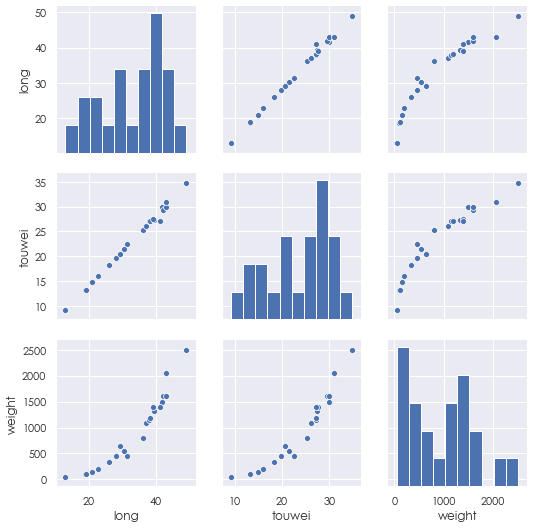

In [77]:
sns.pairplot(dfridge.iloc[:,[1,2,3]])

In [80]:
from statsmodels.stats import outliers_influence

outliers_influence.variance_inflation_factor(dfridge.iloc[:,[0,1,2,3]].values,1)

200.01318114072868

In [82]:
[outliers_influence.variance_inflation_factor(dfridge.iloc[:,[0,1,2,3]].values,i) for i in range(1,dfridge.shape[1]-1)]

[200.01318114072868, 209.4298255105787, 9.687881325900301]

In [83]:
# 岭回归
dfridge = pd.read_excel("dmdata.xlsx",sheet_name = "ridge")
dfridge.head()

,long,touwei,weight,y
0,13.0,9.2,50,13
1,18.7,13.2,102,14
2,21.0,14.8,150,15
3,19.0,13.3,110,16
4,22.8,16.0,200,17


In [84]:
from sklearn import linear_model

ridge = linear_model.Ridge(alpha = 0)
ridge.fit(dfridge.iloc[:,[0,1,2]],dfridge.y)
ridge.coef_

array([ 1.69273561, -2.15883088,  0.00747203])

In [85]:
ridge.score(dfridge.iloc[:,[0,1,2]],dfridge.y)

0.9754229628767032

In [86]:
# 方差不齐 => 残差图

regres = OLS(boston.target,dfboston).fit()
regres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 21 Aug 2019   Prob (F-statistic):          6.72e-135
Time:                        17:16:23   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
cons          36.4595      5.103      7.144      0.000      26.432      46.487
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
sm.stats.diagnostic.het_breuschpagan(regres.resid,sm.add_constant(boston.target))

(67.51872795292222,
 2.0869528126650243e-16,
 77.60750813690214,
 2.033295112499274e-17)

In [89]:
dfwls = pd.read_excel("dmdata.xlsx",sheet_name = "wls")
dfwls.head()

,n,x,y
0,2,188,4.90
1,3,195,4.58
2,11,207,4.40
3,16,217,4.18
4,18,224,3.90


In [91]:
regres = sm.OLS(dfwls.y,sm.add_constant(dfwls.x)).fit()
regres.summary()

d:\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
d:\python37\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     504.8
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           8.71e-12
Time:                        17:29:33   Log-Likelihood:                 12.455
No. Observations:                  15   AIC:                            -20.91
Df Residuals:                      13   BIC:                            -19.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4535      0.173     43.143      0.000       7.080       7.827
x             -0.0149      0.001    -22.468      0.000      -0.016      -0.013
==============================================================================
Omnibus:                        2.218   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.330   Jarque-Bera (JB):                0.598
Skew:                           0.391   Prob(JB):                        0.741
Kurtosis:                       3.587   Cond. No.                     1.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
wlsres = sm.WLS(dfwls.y,sm.add_constant(dfwls.x),weights = dfwls.n).fit()
wlsres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.965
Model:                            WLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     354.1
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           8.19e-11
Time:                        17:30:47   Log-Likelihood:                 13.956
No. Observations:                  15   AIC:                            -23.91
Df Residuals:                      13   BIC:                            -22.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1899      0.188     38.316      0.000       6.785       7.595
x             -0.0140      0.001    -18.816      0.000      -0.016      -0.012
==============================================================================
Omnibus:                        4.495   Durbin-Watson:                   1.408
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                2.058
Skew:                          -0.833   Prob(JB):                        0.357
Kurtosis:                       3.718   Cond. No.                     2.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
wlsres = sm.WLS(dfwls.y,sm.add_constant(dfwls.x),weights = 1).fit()
wlsres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.975
Model:                            WLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     504.8
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           8.71e-12
Time:                        17:31:57   Log-Likelihood:                 12.455
No. Observations:                  15   AIC:                            -20.91
Df Residuals:                      13   BIC:                            -19.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4535      0.173     43.143      0.000       7.080       7.827
x             -0.0149      0.001    -22.468      0.000      -0.016      -0.013
==============================================================================
Omnibus:                        2.218   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.330   Jarque-Bera (JB):                0.598
Skew:                           0.391   Prob(JB):                        0.741
Kurtosis:                       3.587   Cond. No.                     1.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""